Sampling rate of audio 1: 22050 Hz
Sampling rate of audio 2: 22050 Hz
Spectral Centroid 1: [[2278.70198477 3030.49121041 3596.92795823 4068.88873039 4176.97911007]]
Spectral Centroid 2: [[5604.31816806 5648.66255598 5727.95394732 5833.25622762 5906.28673277]]
Spectral Bandwidth 1: [[2087.22927858 2823.04726971 3026.81796712 3057.92865275 3049.38096196]]
Spectral Bandwidth 2: [[2348.70740363 2343.33048548 2359.7121561  2416.06233002 2465.30403352]]
RMS Energy 1: [[0.01074143 0.01776294 0.02290806 0.02698383 0.0285112 ]]
RMS Energy 2: [[6.8624846e-05 2.6958046e-04 4.7128581e-04 7.7845692e-04 1.1315785e-03]]


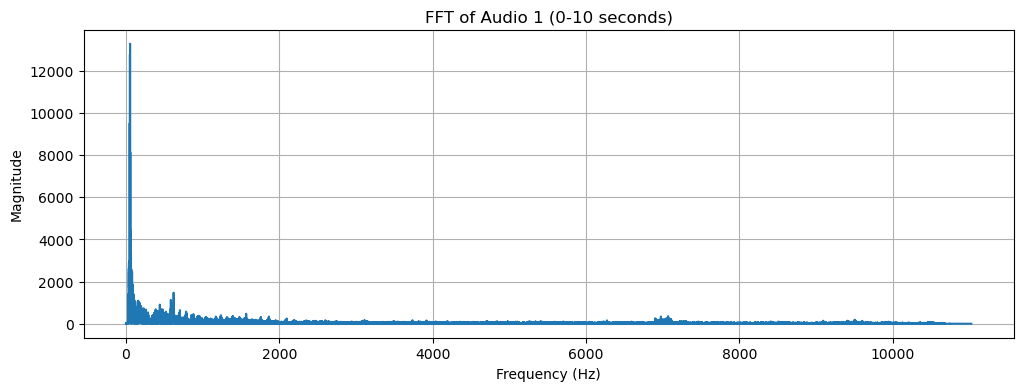

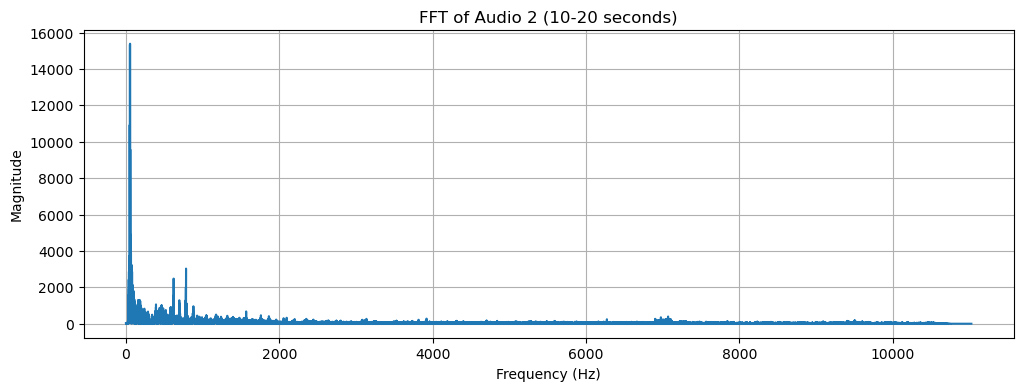

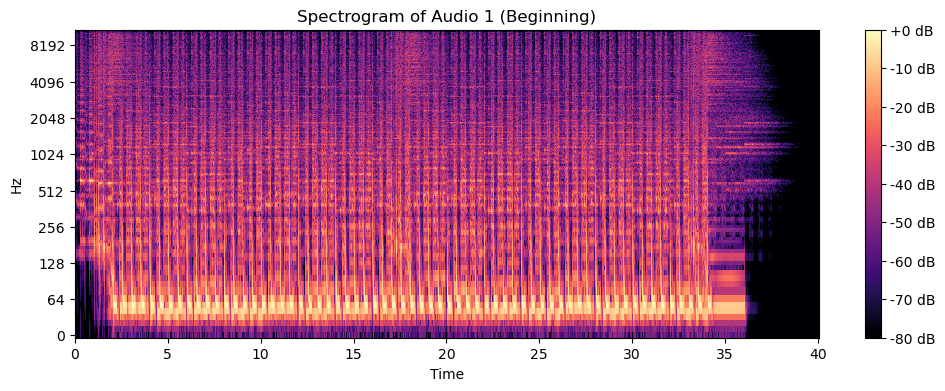

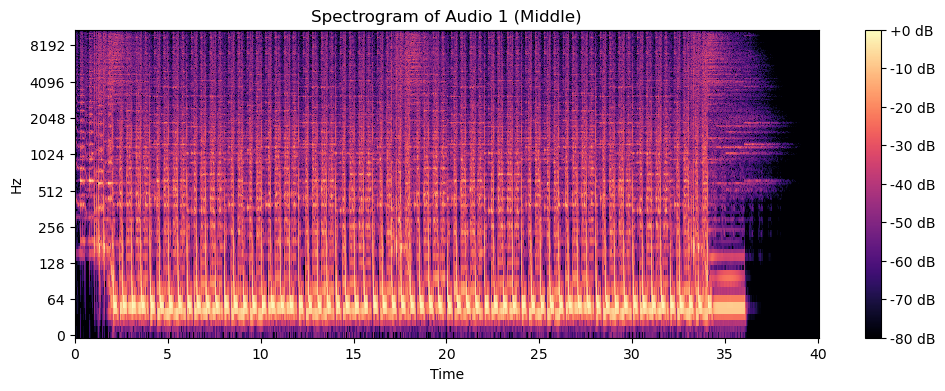

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# Load audio files (replace 'song1.mp3', 'song2.mp3', etc., with your file paths)
audio_file1 = "C:\\Users\\ramup\\Downloads\\funny-background-music-for-video-stories-promo-vlog-playful-dance-169021.mp3"
audio_file2 = "C:\\Users\\ramup\\Downloads\\short-background-music-for-vlogs-and-stories-playful-heerful-music-169023.mp3"

# Load audio and get sampling rate
audio1, sr1 = librosa.load(audio_file1)
audio2, sr2 = librosa.load(audio_file2)

# Display sampling rate
print(f"Sampling rate of audio 1: {sr1} Hz")
print(f"Sampling rate of audio 2: {sr2} Hz")

# Calculate and display spectral features
spectral_centroid1 = librosa.feature.spectral_centroid(y=audio1, sr=sr1)
spectral_centroid2 = librosa.feature.spectral_centroid(y=audio2, sr=sr2)

spectral_bandwidth1 = librosa.feature.spectral_bandwidth(y=audio1, sr=sr1)
spectral_bandwidth2 = librosa.feature.spectral_bandwidth(y=audio2, sr=sr2)

rms_energy1 = librosa.feature.rms(y=audio1)
rms_energy2 = librosa.feature.rms(y=audio2)

# Print the first 5 values of each feature
print("Spectral Centroid 1:", spectral_centroid1[:, :5])
print("Spectral Centroid 2:", spectral_centroid2[:, :5])

print("Spectral Bandwidth 1:", spectral_bandwidth1[:, :5])
print("Spectral Bandwidth 2:", spectral_bandwidth2[:, :5])

print("RMS Energy 1:", rms_energy1[:, :5])
print("RMS Energy 2:", rms_energy2[:, :5])
# Function to plot FFT of a 10-second segment
def plot_fft(audio, sr, start_time, end_time, title):
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    segment = audio[start_sample:end_sample]

    fft_result = np.fft.fft(segment)
    magnitude = np.abs(fft_result)
    frequency = np.fft.fftfreq(len(magnitude), 1 / sr)

    plt.figure(figsize=(12, 4))
    plt.plot(frequency[:len(frequency) // 2], magnitude[:len(magnitude) // 2])
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Plot FFT of 10-second segments for audio 1 and audio 2
plot_fft(audio1, sr1, 0, 10, "FFT of Audio 1 (0-10 seconds)")
plot_fft(audio2, sr2, 0, 10, "FFT of Audio 2 (10-20 seconds)")
# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(12, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Plot spectrogram for audio 1 at the beginning, middle, and 5 seconds before the end
duration = len(audio1) / sr1

plot_spectrogram(audio1, sr1, "Spectrogram of Audio 1 (Beginning)")
plot_spectrogram(audio1, sr1, "Spectrogram of Audio 1 (Middle)")